In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [24]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
104218,00027837_004.png,No Finding,4,27837,50,M,PA,2992,2991,0.143,0.143,NaN
97985,00025849_029.png,Emphysema|Pneumothorax,29,25849,58,M,AP,3056,2544,0.139,0.139,NaN
91551,00022832_020.png,Infiltration,20,22832,52,M,AP,3056,2544,0.139,0.139,NaN


In [79]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5516,00030079_046.png,No Finding,46,30079,016Y,M,AP,3056,2544,0.139,0.139
4489,00022345_003.png,No Finding,3,22345,028Y,F,PA,2992,2991,0.143,0.143
4992,00026342_000.png,No Finding,0,26342,070Y,M,PA,2544,3056,0.139,0.139


In [26]:
## EDA
# Todo 
print (all_xray_df.shape)
all_data=all_xray_df

(112120, 12)


In [27]:
all_labels = np.unique(list(chain(*all_data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_data[c_label] = all_data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)


All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [28]:
all_data.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
32783,00008570_000.png,No Finding,0,8570,24,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19707,00005238_002.png,Atelectasis|Fibrosis|Infiltration,2,5238,35,M,PA,2992,2991,0.143,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18391,00004893_045.png,Atelectasis|Infiltration,45,4893,31,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
len(all_data[all_data.Pneumonia==1])/len(all_data)

0.012763110952550838

In [85]:
all_data.shape
all_data[all_labels].sum()*100/len(all_data)

Atelectasis           10.309490
Cardiomegaly           2.475919
Consolidation          4.162504
Edema                  2.054049
Effusion              11.877453
Emphysema              2.244024
Fibrosis               1.503746
Hernia                 0.202462
Infiltration          17.743489
Mass                   5.156975
No Finding            53.836068
Nodule                 5.646629
Pleural_Thickening     3.019087
Pneumonia              1.276311
Pneumothorax           4.728862
dtype: float64

**Observations**:
Most xrays  are those of healthy people.
% of Pneumonia cases is very low 1.27%

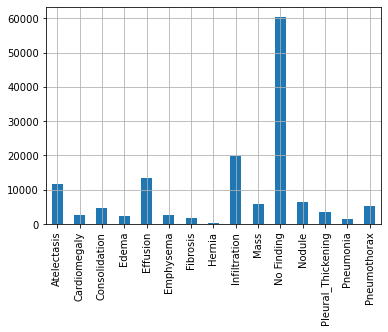

In [31]:
all_data[all_labels].sum().plot(kind='bar')
plt.grid("on")

In [32]:
all_data[all_data["Pneumonia"]==1].head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,60,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
126,00000032_012.png,Atelectasis|Consolidation|Edema|Pneumonia,12,32,55,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
253,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
276,00000061_012.png,Edema|Effusion|Infiltration|Pleural_Thickening...,12,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
279,00000061_015.png,Pneumonia,15,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
590,00000144_001.png,Pneumonia,1,144,83,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
614,00000150_002.png,Atelectasis|Infiltration|Pneumonia,2,150,55,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
640,00000165_001.png,Pneumonia,1,165,76,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
804,00000193_019.png,Pneumonia,19,193,55,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
859,00000211_013.png,Cardiomegaly|Edema|Effusion|Infiltration|Pneum...,13,211,59,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
pneumonia_count=len(all_data[all_data.Pneumonia==1.0])
print ("Total number of patients where finding includes Pneumonia: ", pneumonia_count)
print ("Total number of patients where no finding (healthy) : ", len(all_data[all_data["No Finding"]==1.0]))
nof=len(all_data[all_data["No Finding"]==1.0])
print ("Total number of patients where finding does not include Pneumonia: ", (len(all_data)-nof-pneumonia_count))

Total number of patients where finding includes Pneumonia:  1431
Total number of patients where no finding (healthy) :  60361
Total number of patients where finding does not include Pneumonia:  50328


In [34]:
#Age distribution
print ("Pneumonia: Minimum patient age: ",min(all_data[all_data.Pneumonia==1.0]['Patient Age']))
print ("Pneumonia: Maximum patient age: ",max(all_data[all_data.Pneumonia==1.0]['Patient Age']))

print ("Pneumonia: Number of entires with age > 100: ", (all_data[all_data.Pneumonia==1.0]['Patient Age']>100).sum())


print ("All Data: Minimum patient age: ",min(all_data['Patient Age']))
print ("All Data: Maximum patient age: ",max(all_data['Patient Age']))

print ("Number of entires with age > 100: ", (all_data['Patient Age']>100).sum())


Pneumonia: Minimum patient age:  2
Pneumonia: Maximum patient age:  412
Pneumonia: Number of entires with age > 100:  1
All Data: Minimum patient age:  1
All Data: Maximum patient age:  414
Number of entires with age > 100:  16


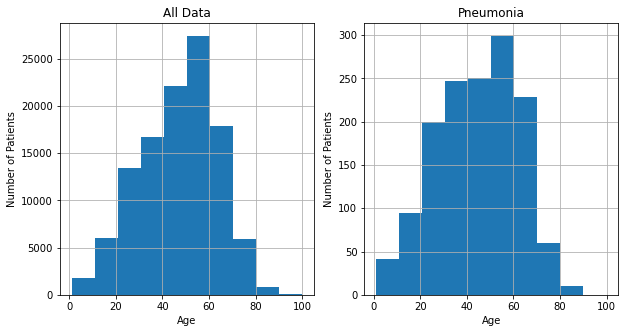

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[1].hist(all_data[all_data.Pneumonia==1.0]['Patient Age'],range=(1,100))
ax[1].set_xlabel("Age")
ax[1].set_title("Pneumonia")
ax[1].set_ylabel("Number of Patients")
ax[1].grid("on")

ax[0].hist(all_data['Patient Age'],range=(1,100))
ax[0].set_xlabel("Age")
ax[0].set_title("All Data")
ax[0].set_ylabel("Number of Patients")
ax[0].grid("on")

plt.show()

**Observations about Patient Age:** The distribution of various age groups in the pneumonia subset, looks similar to the entire dataset. However, there are certain entries that look suspicious i.e. age more than 100yrs. These will be dropped before training.

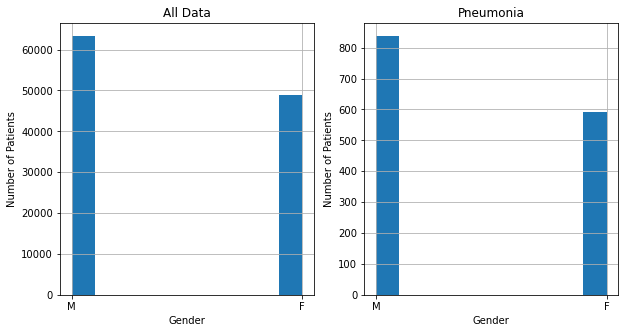

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[1].hist(all_data[all_data.Pneumonia==1.0]['Patient Gender'])
ax[1].set_xlabel("Gender")
ax[1].set_title("Pneumonia")
ax[1].set_ylabel("Number of Patients")
ax[1].grid("on")

ax[0].hist(all_data['Patient Gender'])
ax[0].set_xlabel("Gender")
ax[0].set_title("All Data")
ax[0].set_ylabel("Number of Patients")
ax[0].grid("on")

plt.show()

**Observations about Patient Gender** : Male:Female patient ratios look comparable in the Pneumonia subset, as compared to the entire subset.  The validation set should reflect a similar distribution.

(array([801.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 630.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

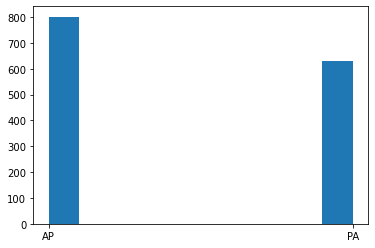

In [38]:
plt.hist(all_data[all_data.Pneumonia==1.0]['View Position'])

**Observations:** There are more AP xrays than PA xrays, which indicate that AP is the preferred postion for chest x-rays for lung diseases.  

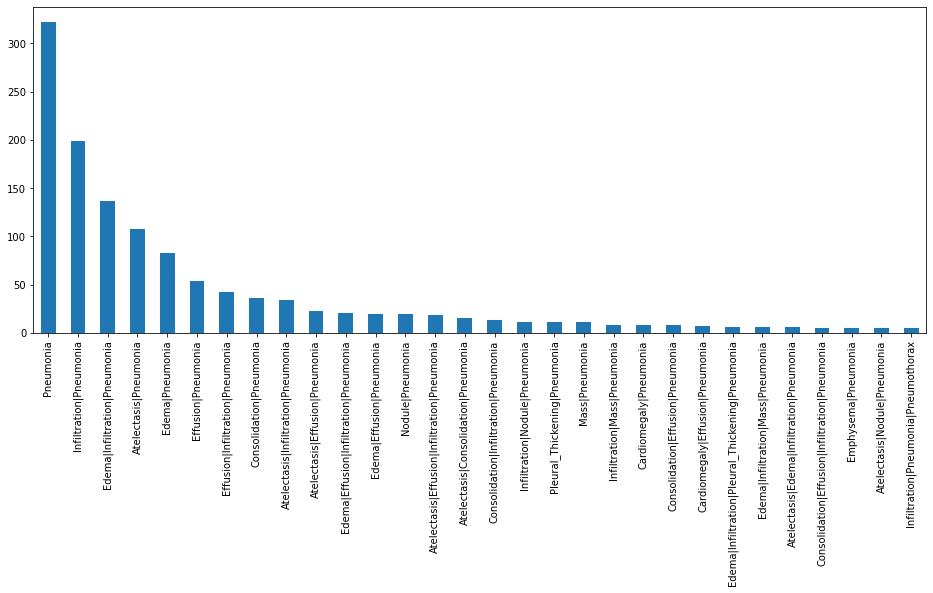

In [37]:
plt.figure(figsize=(16,6))
all_data[all_data.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

**Observation** : The bar graph above shows the most common thoracic conditions that co-exist with Pneumonia. I have selected the 30 most common combinations. This graph also indicates the difficulty one might face in correctly identifying Pneumonia when its Pneumonia with other diseases or correctly indicating its not pneumonia when it is in reality another disease that usually co-exists with Pneumonia.

In [39]:
#number of disease per patient

dc= pd.DataFrame(np.zeros(112120),columns=['count'])
for x in all_labels:
    if x != "No Finding":
        dc['count']+=all_data[x]

dc['count'].value_counts()

0.0    60361
1.0    30963
2.0    14306
3.0     4856
4.0     1247
5.0      301
6.0       67
7.0       16
9.0        2
8.0        1
Name: count, dtype: int64

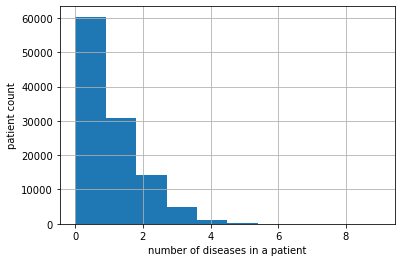

In [40]:
plt.hist(dc['count'])
plt.grid("on")
plt.xlabel("number of diseases in a patient")
plt.ylabel("patient count")
plt.show()

**Observations about Disease count**:
The graph shows that though most patients are reported to have one condition, it is not uncommon to see patients with more than one thoracic/lung condition. The validation set should reflect a similar distribution.

In [41]:
#histogram of intensity values from images

all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_data.shape[0])
all_data['path'] = all_data['Image Index'].map(all_image_paths.get)
all_data.head()

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000003_000.png


In [42]:
from matplotlib import image

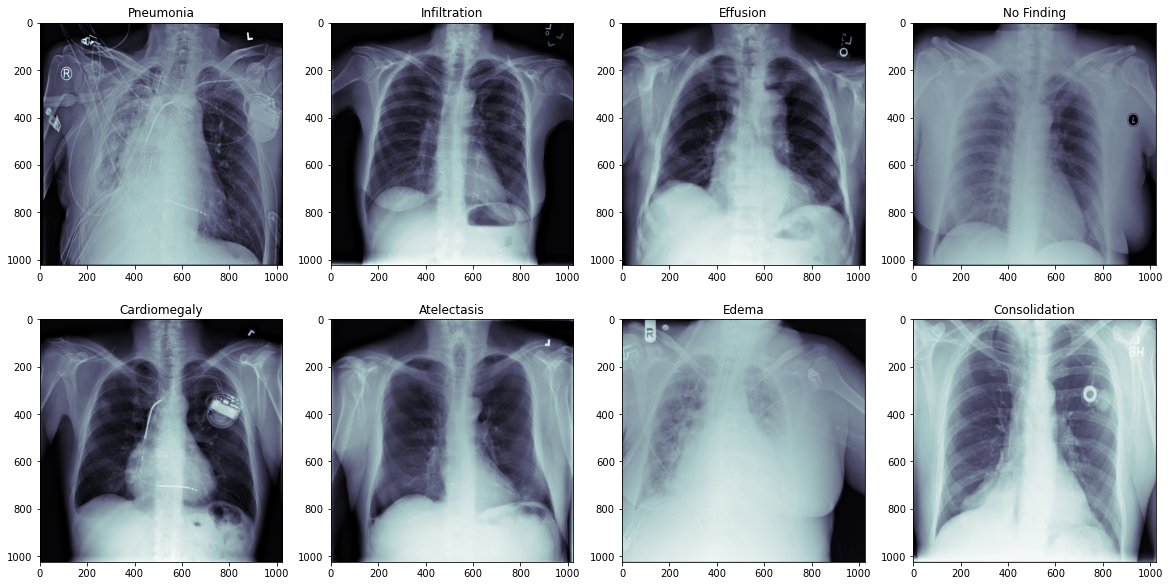

In [43]:
# the x rays for different lung conditions
subset=['Pneumonia','Infiltration','Effusion','No Finding', 'Cardiomegaly', 'Atelectasis','Edema','Consolidation']
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
for i,s in enumerate(subset):
    filename=list(all_data[all_data[s]==1]['path'])[i]
    img_p=image.imread(filename)
    j = (i // 4)
    if i >3: i=i-4
    ax[j,i].set_title(s)
    ax[j,i].imshow(img_p,cmap='bone')
plt.show()

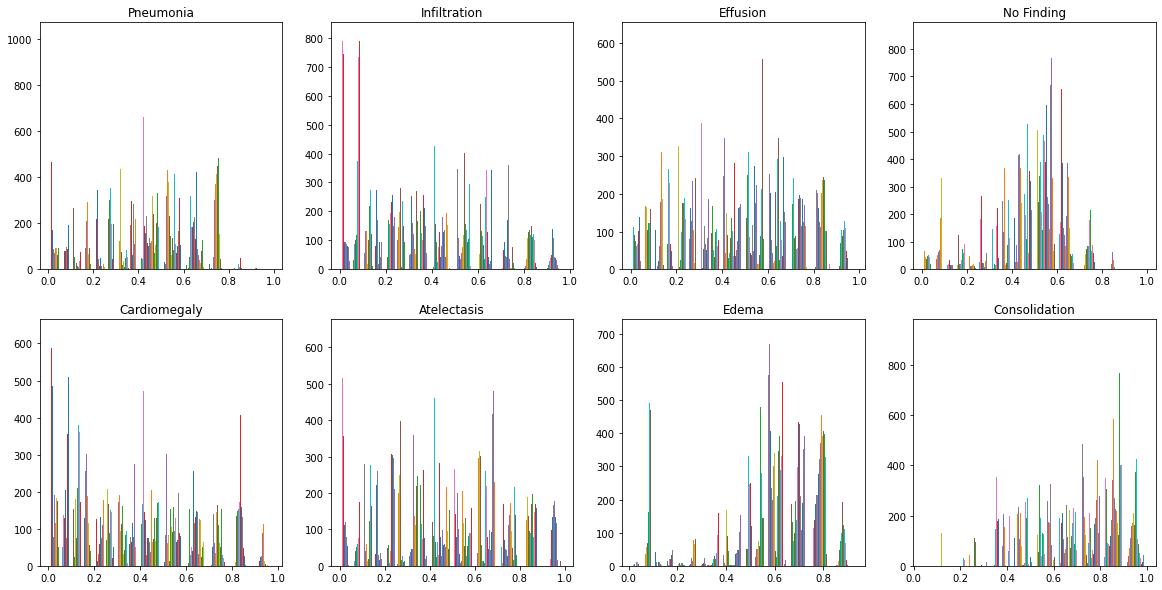

In [44]:
#pixel intensity distribution for different conditions
fig, pax = plt.subplots(2, 4, figsize = (20, 10))
for i,s in enumerate(subset):
    filename=list(all_data[all_data[s]==1]['path'])[i]
    img=image.imread(filename)
    j = (i // 4)
    if i >3: i=i-4
    pax[j,i].set_title(s)
    pax[j,i].hist(img)
plt.show()

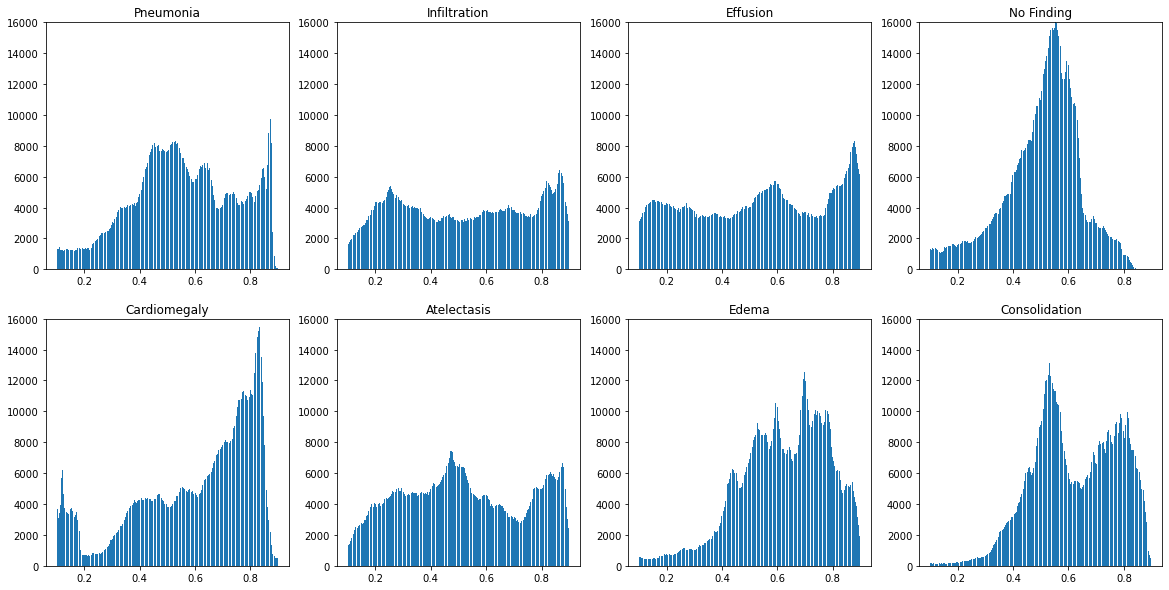

In [45]:
#Intensity dist for different conditions

fig, bax = plt.subplots(2, 4, figsize = (20, 10))

for i,s in enumerate(subset):
    j = (i // 4)
    if i >3: i=i-4
    filename=list(all_data[all_data[s]==1]['path'])[3]
    img=image.imread(filename)
    img_copy = img.copy()
    mask = (img_copy > 0.1) & (img_copy < 0.9)
    
    img = img_copy[mask]
    bax[j,i].set_ylim(top=16000)
    bax[j,i].set_title(s)
    bax[j,i].hist(img.ravel(),bins=256)
plt.show()

**Observations about intensity:**
    1. The pixel intensity distribution is all over the place and doesnt give any conclusive evidence to differenciate between the plots
    2. The intensity distribution over the 256 also doesn't show any pattern specific to a disease type. 
    3. Even after masking out the unwanted intensities(<0.1 and>0.9) the distributions have varying peaks and spread.
    4. Looking only at image intensities, it looks extremely difficult to differentaite Pneumonia from say Atelectasis since the graphs are very similar with no unique points of differentiation. 
    

In [71]:
#composite Pneumonia image 
from PIL import Image

fimg1=list(all_data[all_data['Pneumonia']==1]['path'])[0]
fimg2=list(all_data[all_data['Pneumonia']==1]['path'])[1]
fimg3=list(all_data[all_data['Pneumonia']==1]['path'])[2]
img1=Image.open(fimg2)
img2=Image.open(fimg2)
mask=Image.open(fimg3).convert('L')
c_pneumonia=Image.composite(img1,img2,mask)

for fim in list(all_data[all_data['Pneumonia']==1]['path'])[3:25]:
    img=Image.open(fim)
    c_pneumonia=Image.composite(c_pneumonia,img,mask)



In [72]:
#composite of Infiltration

fimg1=list(all_data[all_data['Infiltration']==1]['path'])[0]
fimg2=list(all_data[all_data['Infiltration']==1]['path'])[1]
fimg3=list(all_data[all_data['Infiltration']==1]['path'])[2]
img1=Image.open(fimg2)
img2=Image.open(fimg2)
mask=Image.open(fimg3).convert('L')
c_infil=Image.composite(img1,img2,mask)

for fim in list(all_data[all_data['Infiltration']==1]['path'])[3:25]:
    img=Image.open(fim)
    c_infil=Image.composite(c_infil,img,mask)



In [73]:
#composite of Effusion
from PIL import Image

fimg1=list(all_data[all_data['Effusion']==1]['path'])[0]
fimg2=list(all_data[all_data['Effusion']==1]['path'])[1]
fimg3=list(all_data[all_data['Effusion']==1]['path'])[2]
img1=Image.open(fimg2)
img2=Image.open(fimg2)
mask=Image.open(fimg3).convert('L')
c_effusion=Image.composite(img1,img2,mask)

for fim in list(all_data[all_data['Effusion']==1]['path'])[3:25]:
    img=Image.open(fim)
    c_effusion=Image.composite(c_effusion,img,mask)


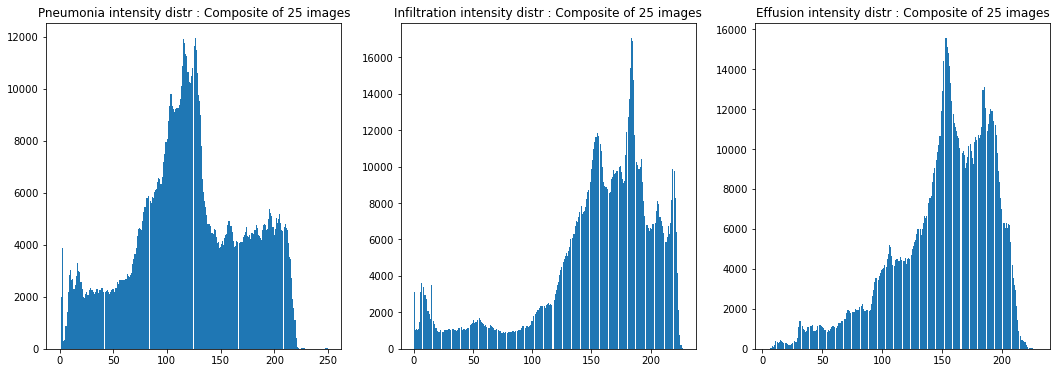

In [78]:
fig,ax = plt.subplots(1,3,figsize=(18,6))

ax[0].hist(np.array(c_pneumonia).ravel(),bins=256)
ax[0].set_title("Pneumonia intensity distr : Composite of 25 images")

ax[1].hist(np.array(c_infil).ravel(),bins=256)
ax[1].set_title("Infiltration intensity distr : Composite of 25 images")

ax[2].hist(np.array(c_effusion).ravel(),bins=256)
ax[2].set_title("Effusion intensity distr : Composite of 25 images")
plt.show()

**Observation from comparing composite images intensity distribution to single image intensity distribution**:
The intensity distribution of the composite images is very different from the intensity distribution of the single x-ray images. Again there is no differenciating factor between the intensity distribution of the image composites of different disease types.